In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [39]:
r = pd.read_csv('demo01.csv')
df = pd.DataFrame(r)



In [41]:
# Removendo variáveis string e criando dummies
df = pd.get_dummies(df, drop_first=True)

# Separando variável resposta e variáveis explicativas
X = df.drop('mau', axis=1)
y = df['mau']

# Dividindo o conjunto de dados em treinamento (70%) e validação (30%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)



#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [31]:
# 1) Definindo um objeto com a função da árvore de decisão vista em aula.

clf = DecisionTreeClassifier(random_state = 100)
clf

DecisionTreeClassifier(random_state=100)

In [42]:
# 2. Treinando o modelo com os dados de treinamento
clf.fit(X_train, y_train)

# Fazendo previsões no conjunto de treinamento
previsoes_treinamento = clf.predict(X_train)

# Avaliando a acurácia no conjunto de treinamento
acuracia_treinamento = accuracy_score(y_train, previsoes_treinamento)
print("Acurácia no conjunto de treinamento:", acuracia_treinamento)


Acurácia no conjunto de treinamento: 0.9912483912483913


In [70]:
# 3. Visualizando a árvore 

plt.figure(figsize=(10,5))
plot_tree(clf,
          feature_names=X_train.columns,
          class_names=['bom', 'mau'],
          filled=True, 
          rounded=True)



InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'sexo_M', 'posse_de_veiculo_Y',
       'posse_de_imovel_Y', 'tipo_renda_Pensioner', 'tipo_renda_State servant',
       'tipo_renda_Student', 'tipo_renda_Working', 'educacao_Higher education',
       'educacao_Incomplete higher', 'educacao_Lower secondary',
       'educacao_Secondary / secondary special', 'estado_civil_Married',
       'estado_civil_Separated', 'estado_civil_Single / not married',
       'estado_civil_Widow', 'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents'],
      dtype='object') instead.

<Figure size 1000x500 with 0 Axes>

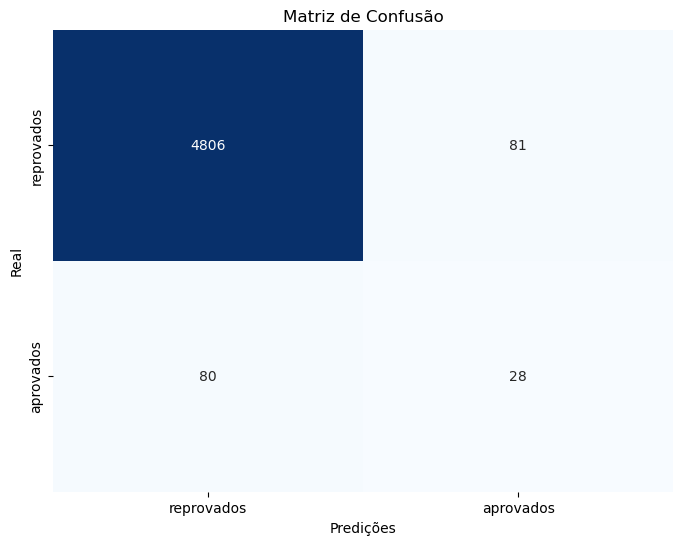

In [51]:
# Fazendo previsões no conjunto de validação
previsoes_validacao = clf.predict(X_val)

# Criando a matriz de confusão
matriz_confusao = confusion_matrix(y_val, previsoes_validacao)

# Criando um DataFrame para facilitar a visualização
nomes_classes = ["reprovados", "aprovados"]
df_matriz_confusao = pd.DataFrame(matriz_confusao, index=nomes_classes, columns=nomes_classes)

# Criando a visualização da matriz de confusão com seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(df_matriz_confusao, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Predições")
plt.ylabel("Real")
plt.show()


In [53]:
# 5) Calcule a acurácia na base de treinamento.

acuracia_treinamento = accuracy_score(y_train, previsoes_treinamento)

# Exibindo a acurácia
print("Acurácia na base de treinamento:", acuracia_treinamento)

Acurácia na base de treinamento: 0.9912483912483913


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [60]:
# 1) Classifique a base de teste de acordo com a árvore que você treinou no item 2.

previsoes_teste = clf.predict(X_train)

print('Valores preditos:') 
print(pd.Series(previsoes_teste).value_counts(), '\n')

print('Valores reais:')
print(y_train.value_counts())

Valores preditos:
False    11443
True       212
Name: count, dtype: int64 

Valores reais:
mau
False    11373
True       282
Name: count, dtype: int64


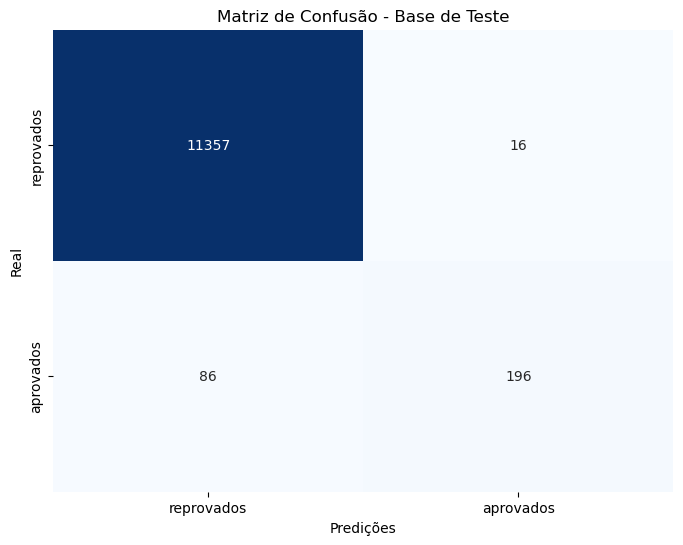

In [61]:
# 2. Produza a visualização da matriz de confusão para a base de teste.

previsoes_teste = clf.predict(X_train)

# Criando a matriz de confusão
matriz_confusao_teste = confusion_matrix(y_train, previsoes_teste)

# Criando um DataFrame para facilitar a visualização
df_matriz_confusao_teste = pd.DataFrame(matriz_confusao_teste, index=nomes_classes, columns=nomes_classes)

# Criando a visualização da matriz de confusão com seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(df_matriz_confusao_teste, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão - Base de Teste")
plt.xlabel("Predições")
plt.ylabel("Real")
plt.show()



In [62]:
# 3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.

previsoes_teste = clf.predict(X_train)

# Calculando a acurácia na base de teste
acuracia_teste = accuracy_score(y_train, previsoes_teste)

print("Acurácia na base de teste:", acuracia_teste)


Acurácia na base de teste: 0.9912483912483913


In [67]:
# 4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

# Criando o objeto da nova árvore de decisão
nova_clf = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

# Treinando o modelo com os novos parâmetros
nova_clf.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
previsoes_nova_arvore = nova_clf.predict(X_val)

# Calculando a matriz de confusão
matriz_confusao_nova_arvore = confusion_matrix(y_val, previsoes_nova_arvore)

# Exibindo a matriz de confusão
print("Matriz de Confusão na base de teste:")
print(matriz_confusao_nova_arvore)

# Calculando a proporção de proponentes classificados como 'maus'
proporcao_maus = matriz_confusao_nova_arvore[1, 0] / (matriz_confusao_nova_arvore[1, 0] + matriz_confusao_nova_arvore[1, 1])
print("Proporção de proponentes classificados como 'maus': {:.2%}".format(proporcao_maus))


Matriz de Confusão na base de teste:
[[4863   24]
 [ 100    8]]
Proporção de proponentes classificados como 'maus': 92.59%


In [69]:
# 5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

todos_bons = ['bons'] * len(y_val)

# Calculando a acurácia ao classificar todos os contratos como 'bons'
acuracia_todos_bons = accuracy_score(y_val, todos_bons)

# Exibindo a acurácia
print("Acurácia ao classificar todos os contratos como 'bons': {:.2%}".format(acuracia_todos_bons))


Acurácia ao classificar todos os contratos como 'bons': 0.00%


C:\Users\milla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:226: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred
